## Loading environment

In [1]:
import sys, getopt, os
import bonesis
import pandas as pd
from colomoto_jupyter import tabulate
import mpbn
import itertools
import math
import numpy
import networkx as nx
import pickle
#import ginsim
import re
import subprocess
import numpy as np
from matplotlib import pyplot as plt
from math import isnan
from copy import deepcopy 
sys.path.append('../../../py_src/')
import funForBonesis

In [2]:
#def add_obs_mutant_nonReach(mutation, phenotypes,data):
#    for p in phenotypes:
#        pMut = p+"_"+[*mutation][0]+"_"+str([*mutation.values()][0])
#        data[pMut] = data[p].copy()
#        data[pMut][[*mutation][0]] = [*mutation.values()][0]

## Loading binarized component activities for each HSPC states
These activities and their binariztation were computed on scRNA-seq data

In [3]:
geneOrder = ["Egr1","Junb","Bclaf1","Myc","Fli1","Gata2","Spi1","Cebpa","Gata1","Klf1","Tal1","Ikzf1","Zfpm1","CDK46CycD","CIPKIP"]


dataTable = pd.read_csv("../obsDataDis.csv",index_col = 0)




data = dataTable.to_dict("index")


clean_data = dict() #Bug of mpbn if nan in dict
for o in data.keys():
    clean_data[o] = {k: data[o][k] for k in data[o] if not isnan(data[o][k])}

data= clean_data
## add mutant obs

    

obsData = pd.DataFrame.from_dict(data, orient="index").fillna('')[geneOrder]

#Add some mutant obs

obsData = obsData[geneOrder].reindex(["iHSC", "srHSC", "qHSC","diff","pLymph","pNeuMast","pMk","pEr","zero"])


obsData = obsData.transpose()

obsDataView = obsData.style.apply(lambda x: ["background: ligthgrey" if v == "" else  "background: darkred" if v == 1.0 else "background: darkblue" for v in x], axis = 1).apply(lambda x: ["color: lightgrey" if v == "" else  "color: darkred" if v == 1.0 else "color: darkblue" for v in x], axis = 1)

#obsDataView = obsDataView.style.
obsDataView.set_precision(0)





,iHSC,srHSC,qHSC,diff,pLymph,pNeuMast,pMk,pEr,zero
Egr1,0,0,1,nan,0,0,0,0,nan
Junb,0,0,1,nan,0,0,0,0,nan
Bclaf1,1,1,0,nan,1,0,0,0,nan
Myc,0,0,1,nan,0,1,1,1,nan
Fli1,1,1,1,nan,0,0,1,0,nan
Gata2,1,0,1,nan,1,1,0,0,nan
Spi1,0,0,0,nan,1,1,0,0,nan
Cebpa,0,0,0,nan,0,1,0,0,nan
Gata1,0,0,0,nan,0,0,1,1,nan
Klf1,0,0,0,nan,0,0,0,1,nan


## Making some adjustements on the binarized data

Because no solution were obtained with the binarized data outputed from the scRNA-seq analysis, we made some adjustements for certain components in certain HSPC states. See our paper for more details.


In [4]:
## Adjustement
dataTable["Myc"].loc["pNeuMast"] =  float('NaN')
dataTable["Myc"].loc["pEr"] =  float('NaN')
dataTable["Myc"].loc["pMk"] =  float('NaN')
dataTable["CDK46CycD"].loc["pMk"] =  float('NaN')
dataTable["Bclaf1"].loc["pLymph"] =  float('NaN')
dataTable["CIPKIP"].loc["pLymph"] =  float('NaN')

dataTable["Egr1"].loc["srHSC"] =  float('NaN')
dataTable["Gata2"].loc["pNeuMast"] =  float('NaN')


data = dataTable.to_dict("index")


clean_data = dict() #Bug of mpbn if nan in dict
for o in data.keys():
    clean_data[o] = {k: data[o][k] for k in data[o] if not isnan(data[o][k])}

data= clean_data

## Add zero obs
data["zero"] ={'Egr1': 0.0,
 'Junb': 0,
 'Tal1': 0.0,
 'Bclaf1': 0.0,
 'Myc': 0.0,
 'Fli1': 0.0,
 'Gata2': 0.0,
 'Ikzf1': 0,
 'Spi1': 0,
 'Cebpa': 0,
 'Gata1': 0.0,
 'Klf1': 0,
 'Zfpm1': 0.0,
 'CIPKIP': 0,
 'CDK46CycD': 0.0}

pd.DataFrame(data)
pd.DataFrame(data)

#data["G0MkHSC"] = {"Klf1":0,'Junb': 1,'Tal1':1,'CIPKIP': 1,"Ikzf1":0,"Cebpa":0,"Spi1":0,"CDK46CycD":0}
#data["prolifNeuMast"] = {'Egr1': 0,'Junb': 0,'Tal1': 0,'Fli1': 0,'Spi1': 1,'Cebpa': 1,'Klf1': 0,'Zfpm1': 0.0,'CIPKIP': 0,"CDK46CycD":1}
#add_obs_mutant_nonReach({'Gata1': 0},["pEr","pMk"],data)
#add_obs_mutant_nonReach({'Fli1': 0},["pMk"],data)
#dataTable

/home/leonard/bin/miniconda3/envs/bonesis_env/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,iHSC,srHSC,qHSC,preDiff,pLymph,pNeuMast,pMk,pEr,zero
Egr1,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Junb,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bclaf1,1.0,1.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0
Myc,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0
Fli1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Gata2,1.0,0.0,1.0,0.0,1.0,NaN,0.0,0.0,0.0
Spi1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
Cebpa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Gata1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
Klf1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
    

obsData = pd.DataFrame.from_dict(data, orient="index").fillna('')[geneOrder]

#Add some mutant obs

obsData = obsData[geneOrder].reindex(["iHSC", "srHSC", "qHSC","preDiff","pLymph","pNeuMast","pMk","pEr","zero"])


obsData = obsData.transpose()

obsDataView = obsData.style.apply(lambda x: ["background: ligthgrey" if v == "" else  "background: darkred" if v == 1.0 else "background: darkblue" for v in x], axis = 1).apply(lambda x: ["color: lightgrey" if v == "" else  "color: darkred" if v == 1.0 else "color: darkblue" for v in x], axis = 1)

#obsDataView = obsDataView.style.
obsDataView.set_precision(0)

,iHSC,srHSC,qHSC,preDiff,pLymph,pNeuMast,pMk,pEr,zero
Egr1,0,,1,0,0,0,0,0,0
Junb,0,0,1,0,0,0,0,0,0
Bclaf1,1,1,0,1,,0,0,0,0
Myc,0,0,1,1,0,,,,0
Fli1,1,1,1,0,0,0,1,0,0
Gata2,1,0,1,0,1,,0,0,0
Spi1,0,0,0,1,1,1,0,0,0
Cebpa,0,0,0,0,0,1,0,0,0
Gata1,0,0,0,0,0,0,1,1,0
Klf1,0,0,0,0,0,0,0,1,0


## Loading influence graph
A subset of 13 TFs and 2 cell cycle complexes were selected based on our scRNA-seq analysis and prior knowledge of early hematopoiesis. This influence graph is based on the transcriptional network of these components deduced from scRNA-seq data with SCENIC and interactions previously characterized in the literature.

# computing graph layout...


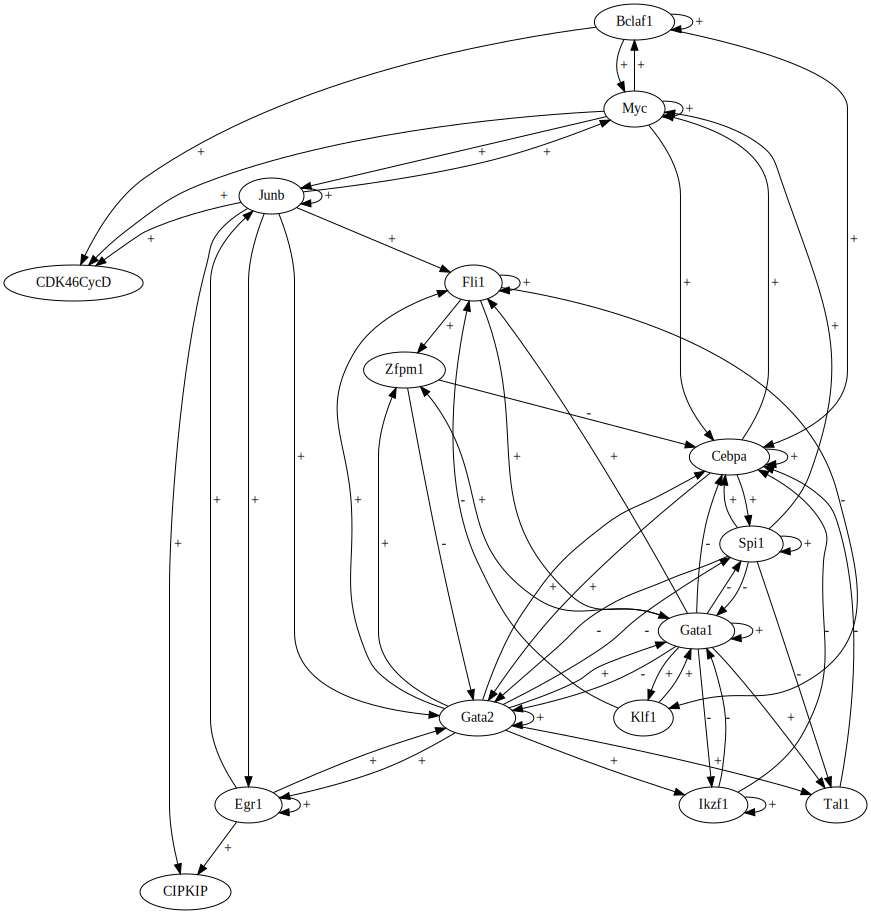

In [6]:
influenceGraphTable = pd.read_table("../influenceGraph/infGraphTable45.tsv")
influenceGraphTable = influenceGraphTable.drop_duplicates(subset=['tf', 'target', 'mor'])
len(influenceGraphTable)
    
# Loading constraints
    
# Creating influence graph
inf = []
for r in influenceGraphTable.index:
    inf.append((influenceGraphTable["tf"][r],influenceGraphTable["target"][r],dict(sign= influenceGraphTable["mor"][r])))


#inf.remove(('Junb', 'Gata2', {'sign': 1})) #  no trust in auto neg from scenic 

dom0 = bonesis.InfluenceGraph(inf, maxclause = 3,exact=False)
allEdges = funForBonesis.multiDiGraphToEdgeList(dom0)
dom0
#inf.append(('Gata1', 'CDK46CycD', {'sign': 1})) # in litt and in Scenic in 42 runs    

dom = bonesis.InfluenceGraph(inf, maxclause = 3,exact=True)


#len(dom.edges())

dom

In [7]:
len(inf)

60

## Definition of the dynamical constraints with Bonesis
Our goal is to obtain a Boolean network relying on the input influence graph able to reproduce the dynamics observed in the scRNA seq analysis (pseudotrajectory analysis) 

In [8]:
dom = bonesis.InfluenceGraph(inf,exact=False, maxclause = 3)
dom
bo = bonesis.BoNesis(dom, data)
bo.settings["parallel"] = 24

fLymph = bo.fixed(~bo.obs("pLymph"))
fEr = bo.fixed(~bo.obs("pEr"));
fMk = bo.fixed(~bo.obs("pMk"));
fNeuMast = bo.fixed(~bo.obs("pNeuMast"));
start = ~bo.obs("iHSC")

start >= ~bo.obs("srHSC")
start >= ~bo.obs("qHSC")
start >= fLymph
start >= ~bo.obs("preDiff") >= fEr
start >= ~bo.obs("preDiff") >= fMk
start >= ~bo.obs("preDiff") >= fNeuMast

~bo.obs("srHSC") >= start
~bo.obs("qHSC") >= start
~bo.obs("preDiff") / ~bo.obs("qHSC")
~bo.obs("preDiff") / ~bo.obs("srHSC")
~bo.obs("preDiff") / start
~bo.obs('zero') / fNeuMast
~bo.obs('zero') / fMk
~bo.obs('zero') / fEr

~bo.obs('zero') / fLymph
~bo.obs("iHSC") >> "fixpoints" ^ {bo.obs(obs) for obs in ["pLymph", "pNeuMast","pEr","pMk","zero"]};


We can save the encoded problem in asp

In [9]:
view = bo.boolean_networks()
view.standalone(output_filename="test.asp")


## Inference of a diverse subset of solutions
We infer Boolean network solutions of our problem by imposing diversity among our solutions and discarding solutions with cyclic attractors because we assume that the biological system does not exhibit oscillatory behaviors.

In [10]:
solutions = []
for bn in bo.diverse_boolean_networks(): 
    if(funForBonesis.has_cyclic(bn)):
        print("HAS CYCLIC ATTRACTORS, IGNORING")
        continue
    if len(solutions) > 1000:
        break
    solutions.append(bn)
    print(len(solutions))
print(len(solutions))

Grounding...done in 0.1s
Found 1 solutions in 3.8s (first in 3.8s; rate 3.8s)1
Found 2 solutions in 10.4s (first in 3.8s; rate 5.2s)2
Found 3 solutions in 10.6s (first in 3.8s; rate 3.5s)3
Found 4 solutions in 10.9s (first in 3.8s; rate 2.7s)4
Found 5 solutions in 11.1s (first in 3.8s; rate 2.2s)5
Found 6 solutions in 11.3s (first in 3.8s; rate 1.9s)6
Found 7 solutions in 11.6s (first in 3.8s; rate 1.7s)7
Found 8 solutions in 11.8s (first in 3.8s; rate 1.5s)8
Found 9 solutions in 12.0s (first in 3.8s; rate 1.3s)9
Found 10 solutions in 12.2s (first in 3.8s; rate 1.2s)10
Found 11 solutions in 12.6s (first in 3.8s; rate 1.1s)11
Found 12 solutions in 12.9s (first in 3.8s; rate 1.1s)12
Found 13 solutions in 13.1s (first in 3.8s; rate 1.0s)13
Found 14 solutions in 13.3s (first in 3.8s; rate 1.0s)14
Found 15 solutions in 13.6s (first in 3.8s; rate 0.9s)15
Found 16 solutions in 13.8s (first in 3.8s; rate 0.9s)16
Found 17 solutions in 14.0s (first in 3.8s; rate 0.8s)17
Found 18 solutions in 14.

Found 143 solutions in 71.9s (first in 3.8s; rate 0.5s)143
Found 144 solutions in 72.4s (first in 3.8s; rate 0.5s)144
Found 145 solutions in 73.1s (first in 3.8s; rate 0.5s)145
Found 146 solutions in 73.7s (first in 3.8s; rate 0.5s)146
Found 147 solutions in 74.5s (first in 3.8s; rate 0.5s)147
Found 148 solutions in 75.3s (first in 3.8s; rate 0.5s)148
Found 149 solutions in 76.0s (first in 3.8s; rate 0.5s)149
Found 150 solutions in 76.7s (first in 3.8s; rate 0.5s)150
Found 151 solutions in 77.3s (first in 3.8s; rate 0.5s)151
Found 152 solutions in 78.1s (first in 3.8s; rate 0.5s)152
Found 153 solutions in 78.8s (first in 3.8s; rate 0.5s)153
Found 154 solutions in 79.6s (first in 3.8s; rate 0.5s)154
Found 155 solutions in 80.5s (first in 3.8s; rate 0.5s)155
Found 156 solutions in 81.2s (first in 3.8s; rate 0.5s)156
Found 157 solutions in 81.9s (first in 3.8s; rate 0.5s)157
Found 158 solutions in 82.9s (first in 3.8s; rate 0.5s)158
Found 159 solutions in 83.8s (first in 3.8s; rate 0.5s)1

Found 280 solutions in 230.3s (first in 3.8s; rate 0.8s)280
Found 281 solutions in 232.2s (first in 3.8s; rate 0.8s)281
Found 282 solutions in 234.0s (first in 3.8s; rate 0.8s)282
Found 283 solutions in 235.7s (first in 3.8s; rate 0.8s)283
Found 284 solutions in 237.6s (first in 3.8s; rate 0.8s)284
Found 285 solutions in 239.6s (first in 3.8s; rate 0.8s)285
Found 286 solutions in 241.3s (first in 3.8s; rate 0.8s)286
Found 287 solutions in 243.0s (first in 3.8s; rate 0.8s)287
Found 288 solutions in 244.6s (first in 3.8s; rate 0.8s)288
Found 289 solutions in 246.4s (first in 3.8s; rate 0.9s)289
Found 290 solutions in 248.2s (first in 3.8s; rate 0.9s)290
Found 291 solutions in 250.3s (first in 3.8s; rate 0.9s)291
Found 292 solutions in 251.9s (first in 3.8s; rate 0.9s)292
Found 293 solutions in 253.7s (first in 3.8s; rate 0.9s)293
Found 294 solutions in 255.4s (first in 3.8s; rate 0.9s)294
Found 295 solutions in 257.3s (first in 3.8s; rate 0.9s)295
Found 296 solutions in 259.2s (first in 

Found 416 solutions in 536.9s (first in 3.8s; rate 1.3s)416
Found 417 solutions in 539.9s (first in 3.8s; rate 1.3s)417
Found 418 solutions in 542.7s (first in 3.8s; rate 1.3s)418
Found 419 solutions in 545.5s (first in 3.8s; rate 1.3s)419
Found 420 solutions in 548.3s (first in 3.8s; rate 1.3s)420
Found 421 solutions in 550.9s (first in 3.8s; rate 1.3s)421
Found 422 solutions in 553.4s (first in 3.8s; rate 1.3s)422
Found 423 solutions in 556.6s (first in 3.8s; rate 1.3s)423
Found 424 solutions in 559.9s (first in 3.8s; rate 1.3s)424
Found 425 solutions in 563.3s (first in 3.8s; rate 1.3s)425
Found 426 solutions in 566.7s (first in 3.8s; rate 1.3s)426
Found 427 solutions in 570.2s (first in 3.8s; rate 1.3s)427
Found 428 solutions in 573.8s (first in 3.8s; rate 1.3s)428
Found 429 solutions in 576.9s (first in 3.8s; rate 1.3s)429
Found 430 solutions in 579.8s (first in 3.8s; rate 1.3s)430
Found 431 solutions in 583.0s (first in 3.8s; rate 1.4s)431
Found 432 solutions in 585.8s (first in 

Found 552 solutions in 1001.4s (first in 3.8s; rate 1.8s)552
Found 553 solutions in 1005.5s (first in 3.8s; rate 1.8s)553
Found 554 solutions in 1009.2s (first in 3.8s; rate 1.8s)554
Found 555 solutions in 1013.1s (first in 3.8s; rate 1.8s)555
Found 556 solutions in 1017.4s (first in 3.8s; rate 1.8s)556
Found 557 solutions in 1021.2s (first in 3.8s; rate 1.8s)557
Found 558 solutions in 1025.4s (first in 3.8s; rate 1.8s)558
Found 559 solutions in 1029.5s (first in 3.8s; rate 1.8s)559
Found 560 solutions in 1033.5s (first in 3.8s; rate 1.8s)560
Found 561 solutions in 1037.3s (first in 3.8s; rate 1.8s)561
Found 562 solutions in 1041.4s (first in 3.8s; rate 1.9s)562
Found 563 solutions in 1045.1s (first in 3.8s; rate 1.9s)563
Found 564 solutions in 1049.2s (first in 3.8s; rate 1.9s)564
Found 565 solutions in 1053.3s (first in 3.8s; rate 1.9s)565
Found 566 solutions in 1057.3s (first in 3.8s; rate 1.9s)566
Found 567 solutions in 1061.5s (first in 3.8s; rate 1.9s)567
Found 568 solutions in 1

Found 686 solutions in 1609.2s (first in 3.8s; rate 2.3s)686
Found 687 solutions in 1614.3s (first in 3.8s; rate 2.3s)687
Found 688 solutions in 1619.5s (first in 3.8s; rate 2.4s)688
Found 689 solutions in 1625.3s (first in 3.8s; rate 2.4s)689
Found 690 solutions in 1630.2s (first in 3.8s; rate 2.4s)690
Found 691 solutions in 1635.2s (first in 3.8s; rate 2.4s)691
Found 692 solutions in 1640.2s (first in 3.8s; rate 2.4s)692
Found 693 solutions in 1645.8s (first in 3.8s; rate 2.4s)693
Found 694 solutions in 1651.0s (first in 3.8s; rate 2.4s)694
Found 695 solutions in 1656.5s (first in 3.8s; rate 2.4s)695
Found 696 solutions in 1661.6s (first in 3.8s; rate 2.4s)696
Found 697 solutions in 1667.0s (first in 3.8s; rate 2.4s)697
Found 698 solutions in 1672.5s (first in 3.8s; rate 2.4s)698
Found 699 solutions in 1678.3s (first in 3.8s; rate 2.4s)699
Found 700 solutions in 1683.6s (first in 3.8s; rate 2.4s)700
Found 701 solutions in 1689.0s (first in 3.8s; rate 2.4s)701
Found 702 solutions in 1

Found 820 solutions in 2405.0s (first in 3.8s; rate 2.9s)820
Found 821 solutions in 2411.6s (first in 3.8s; rate 2.9s)821
Found 822 solutions in 2418.2s (first in 3.8s; rate 2.9s)822
Found 823 solutions in 2424.8s (first in 3.8s; rate 2.9s)823
Found 824 solutions in 2431.2s (first in 3.8s; rate 3.0s)824
Found 825 solutions in 2437.9s (first in 3.8s; rate 3.0s)825
Found 826 solutions in 2444.7s (first in 3.8s; rate 3.0s)826
Found 827 solutions in 2451.2s (first in 3.8s; rate 3.0s)827
Found 828 solutions in 2458.0s (first in 3.8s; rate 3.0s)828
Found 829 solutions in 2464.6s (first in 3.8s; rate 3.0s)829
Found 830 solutions in 2471.5s (first in 3.8s; rate 3.0s)830
Found 831 solutions in 2478.3s (first in 3.8s; rate 3.0s)831
Found 832 solutions in 2485.2s (first in 3.8s; rate 3.0s)832
Found 833 solutions in 2491.9s (first in 3.8s; rate 3.0s)833
Found 834 solutions in 2499.0s (first in 3.8s; rate 3.0s)834
Found 835 solutions in 2505.8s (first in 3.8s; rate 3.0s)835
Found 836 solutions in 2

Found 954 solutions in 3386.6s (first in 3.8s; rate 3.5s)954
Found 955 solutions in 3394.6s (first in 3.8s; rate 3.6s)955
Found 956 solutions in 3403.2s (first in 3.8s; rate 3.6s)956
Found 957 solutions in 3411.1s (first in 3.8s; rate 3.6s)957
Found 958 solutions in 3419.2s (first in 3.8s; rate 3.6s)958
Found 959 solutions in 3427.3s (first in 3.8s; rate 3.6s)959
Found 960 solutions in 3434.7s (first in 3.8s; rate 3.6s)960
Found 961 solutions in 3442.6s (first in 3.8s; rate 3.6s)961
Found 962 solutions in 3450.7s (first in 3.8s; rate 3.6s)962
Found 963 solutions in 3458.7s (first in 3.8s; rate 3.6s)963
Found 964 solutions in 3466.7s (first in 3.8s; rate 3.6s)964
Found 965 solutions in 3474.8s (first in 3.8s; rate 3.6s)965
Found 966 solutions in 3483.0s (first in 3.8s; rate 3.6s)966
Found 967 solutions in 3491.6s (first in 3.8s; rate 3.6s)967
Found 968 solutions in 3500.0s (first in 3.8s; rate 3.6s)968
Found 969 solutions in 3508.1s (first in 3.8s; rate 3.6s)969
Found 970 solutions in 3

In [11]:
len(solutions)

1001

In [12]:
solutions[2]

Bclaf1 <- Myc
CDK46CycD <- Bclaf1|Junb
CIPKIP <- Egr1
Cebpa <- (!Zfpm1&Cebpa)|(!Zfpm1&!Gata1)|(!Gata1&Spi1&Cebpa&Myc)
Egr1 <- (Egr1&Junb)|(Gata2&Junb)
Fli1 <- (Gata1&Fli1)|(Gata1&Junb)|(!Klf1&Junb)
Gata1 <- Fli1|(Gata1&Klf1)|(Gata2&!Spi1&Gata1)
Gata2 <- (Gata2&Cebpa)|(Gata2&!Gata1)|(Egr1&!Spi1&Junb&!Zfpm1)
Ikzf1 <- (Gata2&!Gata1)|(Ikzf1&!Gata1)
Junb <- Myc
Klf1 <- !Fli1&Gata1
Myc <- (Bclaf1&Cebpa)|(Junb&Cebpa)|(Cebpa&Myc)
Spi1 <- Cebpa|!Gata1
Tal1 <- (Gata2&Gata1)|(Gata1&!Spi1)
Zfpm1 <- Fli1|Gata1|Gata2

In [13]:
table = pd.DataFrame(solutions)
for n in table.nunique().index:
    if table.nunique()[n] > 1:
        print(n)
        print(pd.DataFrame(table[n].unique())) 

CDK46CycD
                                       0
0  (Junb&Bclaf1)|(Bclaf1&Myc)|(Junb&Myc)
1                            Bclaf1|Junb
2                        Bclaf1|Junb|Myc
3                      Bclaf1|(Junb&Myc)
4                (Bclaf1&Myc)|(Junb&Myc)
5               (Junb&Bclaf1)|(Junb&Myc)
CIPKIP
           0
0       Junb
1       Egr1
2  Egr1|Junb
3  Egr1&Junb
Cebpa
                                                    0
0                                        !Zfpm1&!Tal1
1   (!Zfpm1&Cebpa)|(!Zfpm1&!Gata1)|(!Gata1&Spi1&Ce...
2   (!Zfpm1&Cebpa)|(!Zfpm1&!Gata1)|(!Tal1&!Gata1&M...
3   (!Zfpm1&Cebpa)|(!Zfpm1&!Gata1)|(!Gata1&Myc&Spi...
4   (!Zfpm1&Cebpa)|(!Zfpm1&!Gata1)|(!Tal1&!Gata1&M...
5   (!Zfpm1&Cebpa)|(!Zfpm1&!Gata1)|(Gata2&!Gata1&M...
6   (!Zfpm1&Cebpa)|(!Zfpm1&!Gata1)|(Gata2&!Gata1&M...
7   (!Zfpm1&Cebpa)|(!Zfpm1&!Gata1)|(!Gata1&Myc&Spi...
8   (Bclaf1&!Zfpm1&!Gata1)|(Spi1&!Gata1&!Ikzf1)|(G...
9   (!Zfpm1&Cebpa)|(!Zfpm1&Spi1&!Gata1)|(Gata2&!Ga...
10  (!Zfpm1&Spi1&Cebpa)|(!Zfpm1

In [14]:
pd.DataFrame(solutions[2].attractors(reachable_from=data["iHSC"]))

,Bclaf1,CDK46CycD,CIPKIP,Cebpa,Egr1,Fli1,Gata1,Gata2,Ikzf1,Junb,Klf1,Myc,Spi1,Tal1,Zfpm1
0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1


## Exploring the behavior of solutions in the face of mutating perturbations

We define two functions to perform this analysis. Our strategy is to find for each of the solutions inferred, all reachable attractors from our initial iHSC state for a particular alteration (KO/KI). We performed this analysis for the KO of each of the TFs in the networks as well as the KI for the components that were found to be overactivated under aging conditions in previous studies.

In [15]:
def testPerturb(model,perturbations,data):
    test_mut = model.copy()
    for perturbation in perturbations:
        del test_mut[[*perturbation.keys()][0]]
        test_mut[[*perturbation.keys()][0]] = [*perturbation.values()][0]
        data_mut = deepcopy(data)
        if ([*perturbation.values()][0] == 1) | ([*perturbation.values()][0] == 0):
            data_mut["iHSC"][[*perturbation.keys()][0]] = [*perturbation.values()][0]
    att = pd.DataFrame(test_mut.attractors(reachable_from=data_mut["iHSC"]))[geneOrder]
    return att

In [16]:
def getMutAttractors(perturbations,sol,data):
    geneMut = list(perturbations[0].keys())[0]
    mut = []
    for s in solutions :
        if list(perturbations[0].values())[0] == 0 :
            koStr = "KO"
        else:
            koStr = "KI"
            

        possiblePhDf = pd.DataFrame(testPerturb(s,perturbations,data))
        possiblePhDf.sort_values(by= geneOrder, inplace=True)
        possiblePhDf.index = [str(i) for i in range(0,len(possiblePhDf))]
        possiblePh = possiblePhDf.to_dict() 
        if possiblePh not in mut:
            mut.append(possiblePh)
            
    possiblePhAll = pd.DataFrame(mut[0])
    possiblePhAll = possiblePhAll.rename(index=lambda s: geneMut + koStr + "_0" + "_" + s)
    i=1
    for a in mut[1:]:
        df = pd.DataFrame(a)
        df.index = [str(j) for j in range(0,len(df))]
        df = df.rename(index=lambda s: geneMut + koStr +"_"+ str(i) + "_" + s)
        possiblePhAll = possiblePhAll.append(df)

        i += 1

    return possiblePhAll



## Test all the KO mutations

In [17]:
getMutAttractors(perturbations=[{"Spi1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Spi1KO_0_0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Spi1KO_0_1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Spi1KO_0_2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
Spi1KO_0_3,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
Spi1KO_1_0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Spi1KO_1_1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Spi1KO_1_2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
Spi1KO_1_3,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
Spi1KO_1_4,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
Spi1KO_2_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
getMutAttractors(perturbations=[{"Cebpa":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
CebpaKO_0_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CebpaKO_0_1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
CebpaKO_0_2,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
CebpaKO_0_3,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
CebpaKO_1_0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
CebpaKO_1_1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
CebpaKO_1_2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
CebpaKO_1_3,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0
CebpaKO_1_4,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
CebpaKO_2_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
getMutAttractors(perturbations=[{"Junb":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
JunbKO_0_0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
JunbKO_0_1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
JunbKO_0_2,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
JunbKO_0_3,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0
JunbKO_0_4,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
JunbKO_0_5,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0
JunbKO_0_6,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0
JunbKO_0_7,0,0,1,1,0,1,1,0,0,0,0,1,1,1,0
JunbKO_1_0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
JunbKO_1_1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [20]:
getMutAttractors(perturbations=[{"Egr1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Egr1KO_0_0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Egr1KO_0_1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Egr1KO_0_2,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
Egr1KO_0_3,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0
Egr1KO_0_4,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
Egr1KO_1_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Egr1KO_1_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Egr1KO_1_2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Egr1KO_1_3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
Egr1KO_1_4,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [21]:
getMutAttractors(perturbations=[{"Gata2":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Gata2KO_0_0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Gata2KO_0_1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Gata2KO_0_2,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
Gata2KO_1_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gata2KO_1_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Gata2KO_1_2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Gata2KO_1_3,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
Gata2KO_2_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gata2KO_2_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Gata2KO_2_2,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [22]:
getMutAttractors(perturbations=[{"Gata1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Gata1KO_0_0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0
Gata1KO_0_1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0
Gata1KO_0_2,1,1,0,0,1,1,0,0,0,0,0,1,1,0,1
Gata1KO_0_3,1,1,0,0,1,1,1,0,0,0,0,1,1,0,1
Gata1KO_0_4,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gata1KO_15_0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0
Gata1KO_15_1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0
Gata1KO_15_2,1,1,0,0,1,1,0,0,0,0,1,1,1,0,1
Gata1KO_15_3,1,1,0,0,1,1,1,0,0,0,0,1,1,0,1


In [23]:
getMutAttractors(perturbations=[{"Myc":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
MycKO_0_0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
MycKO_0_1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
MycKO_0_2,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
MycKO_0_3,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0
MycKO_0_4,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
MycKO_1_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
MycKO_1_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
MycKO_1_2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
MycKO_1_3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
MycKO_1_4,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [24]:
getMutAttractors(perturbations=[{"Ikzf1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Ikzf1KO_0_0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Ikzf1KO_0_1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Ikzf1KO_0_2,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
Ikzf1KO_0_3,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
Ikzf1KO_1_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ikzf1KO_1_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Ikzf1KO_1_2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Ikzf1KO_1_3,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
Ikzf1KO_1_4,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
Ikzf1KO_2_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
getMutAttractors(perturbations=[{"Bclaf1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Bclaf1KO_0_0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Bclaf1KO_0_1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Bclaf1KO_0_2,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
Bclaf1KO_0_3,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0
Bclaf1KO_0_4,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
Bclaf1KO_1_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bclaf1KO_1_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Bclaf1KO_1_2,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
Bclaf1KO_2_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bclaf1KO_2_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0


In [26]:
getMutAttractors(perturbations=[{"Tal1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Tal1KO_0_0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
Tal1KO_0_1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Tal1KO_0_2,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
Tal1KO_0_3,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0
Tal1KO_0_4,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
Tal1KO_1_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Tal1KO_1_1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
Tal1KO_1_2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Tal1KO_1_3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
Tal1KO_1_4,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [27]:
getMutAttractors(perturbations=[{"Zfpm1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Zfpm1KO_0_0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
Zfpm1KO_0_1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Zfpm1KO_0_2,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
Zfpm1KO_0_3,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0
Zfpm1KO_0_4,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zfpm1KO_32_6,0,1,1,1,1,0,0,1,1,0,1,0,0,1,1
Zfpm1KO_32_7,0,1,1,1,1,0,1,1,1,0,0,0,0,1,1
Zfpm1KO_32_8,1,1,0,0,0,1,0,0,1,1,1,1,0,0,1
Zfpm1KO_32_9,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1


In [28]:
getMutAttractors(perturbations=[{"Klf1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Klf1KO_0_0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
Klf1KO_0_1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Klf1KO_0_2,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
Klf1KO_0_3,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0
Klf1KO_0_4,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
Klf1KO_1_0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Klf1KO_1_1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
Klf1KO_1_2,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0
Klf1KO_1_3,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
Klf1KO_2_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
getMutAttractors(perturbations=[{"Fli1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Fli1KO_0_0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Fli1KO_0_1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Fli1KO_0_2,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
Fli1KO_0_3,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0
Fli1KO_0_4,0,1,1,1,0,0,1,1,0,0,0,0,0,1,1
Fli1KO_0_5,0,1,1,1,0,0,1,1,0,0,0,1,0,1,1
Fli1KO_0_6,1,1,0,0,0,1,1,0,0,0,0,1,1,0,1
Fli1KO_0_7,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1
Fli1KO_1_0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0
Fli1KO_1_1,1,1,1,1,0,1,1,1,0,0,0,1,1,1,1


## Test 2 KI mutations

In [30]:
getMutAttractors(perturbations=[{"Junb":1}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
JunbKI_0_0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1
JunbKI_1_0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0
JunbKI_1_1,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1
JunbKI_2_0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0
JunbKI_2_1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1
JunbKI_3_0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1
JunbKI_3_1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1
JunbKI_4_0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0
JunbKI_5_0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,1
JunbKI_5_1,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1


In [31]:
getMutAttractors(perturbations=[{"Egr1":1}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Egr1KI_0_0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,1
Egr1KI_0_1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1
Egr1KI_1_0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1
Egr1KI_1_1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1
Egr1KI_1_2,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1
Egr1KI_1_3,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1
Egr1KI_1_4,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1
Egr1KI_2_0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1
